<a href="https://colab.research.google.com/github/ernestohp/TecnicasIA/blob/main/DesicionTree3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [5]:
url = "https://raw.githubusercontent.com/ernestohp/TecnicasIA/main/dataset_61_iris.csv"
ds = pd.read_csv(url)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Dividimos el dataset en 80% de datos para entrenar y 20% para test
array = ds.values
X = array[:,0:4]
y = array[:,4]

In [23]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1, shuffle = True)

In [24]:
print(X_validation.shape, Y_validation.shape, X_train.shape, Y_train.shape)

(30, 4) (30,) (120, 4) (120,)


In [25]:
# Cargamos los algoritmos
models = []
models.append(("LR", LogisticRegression(solver="liblinear", multi_class="ovr")))
models.append(("CART", DecisionTreeClassifier()))

In [26]:
# evaluamos cada modelo por turnos
results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.950000 (0.055277)
CART: 0.958333 (0.041667)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


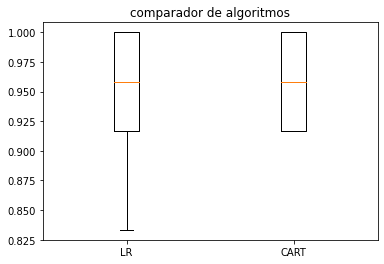

In [27]:
plt.boxplot(results, labels=names)
plt.title("comparador de algoritmos")
plt.show()